<a href="https://colab.research.google.com/github/ansonkwokth/Bs2PhiMuMu_Z-pole/blob/master/hedging_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from src import math_helpers as mh

In [95]:
method = 2

# method 1: the max of the bankroll to be used to buy to hedge
# 0.2 = 20%
delta_thre = 0.2
# method 2: how much w.r.t. to the current bet to team 2 wins:
# if kelly give to bet f1, the max to hedge the team 1 bet is fac_thre * f2
# namely, if fac_thre = 2, and f2 = 0.1, then we would at max buy f2 + 2*f2 = 0.3 to bet on team 2 wins
fac_thre = 0.5

# prob. range
p_range = np.arange(0.01, 1, 0.01)
# how much fraction of bankroll to buy the opposite team (team 2) to hedge
delta_f2_map = np.full((len(p_range), len(p_range)), np.nan)
# how much more w.r.t. to the fraction already betted on the team 1
delta2_map = np.full((len(p_range), len(p_range)), np.nan)

# new profit if team 1 wins
ret1win_map = np.full((len(p_range), len(p_range)), np.nan)
# new profit if team 2 wins
ret2win_map = np.full((len(p_range), len(p_range)), np.nan)

# loop over the p(team 1 wins) at time t0
for i0, p1_hat_t0 in enumerate(p_range):
  # the buy price of team 1 wins
  P1_t0 = mh.p_logit_transf(p1_hat_t0)
  # kelly to buy team 1
  f1 = mh.kelly(p1_hat_t0, 1/P1_t0)
  # shares to buy team 1
  s1 = f1 / P1_t0

  # loop over the p(team 1 wins) at time t1
  for i1, p1_hat_t1 in enumerate(p_range):
    # consider the case only when the estimated p is smaller than the buy price
    if p1_hat_t1 > P1_t0: continue

    # the current expected value of team 1 wins
    EV1 = p1_hat_t1 / P1_t0
    # only need to hedge when EV is negative
    if EV1 > 1: continue

    # estimated team 2 wins, and the buy price, and kelly, and EV
    p2_hat_t1 = 1 - p1_hat_t1
    P2_t1 = mh.p_logit_transf(p2_hat_t1)
    f2 = mh.kelly(p2_hat_t1, 1/P2_t1)
    EV2 = p2_hat_t1 / P2_t1

    # what is the ratio to buy team 2 w.r.t. to the fraction already bought team 1
    delta2 = - (EV1 - 1) / (EV2 - 1)
    # fraction w.r.t. to the total bankroll used to calculate kelly
    delta_f2 = f1 * delta2


    if method == 1:
      delta_f2_thre = delta_thre
    elif method == 2:
      delta_f2_thre = f2*fac_thre

    # if the fraction is larger than the threhold, just buy the threhold value
    delta_f2 = np.min((delta_f2, delta_f2_thre))
    # updte also the fraction w.r.t. to the fraction already bought team 1
    delta2 = delta_f2 / f1


    # orginal shares to buy team 2
    s2 = f2 / P2_t1
    # extra shares to buy team 2 (to hedge team 1 shares)
    delta_s2 = delta_f2 / P2_t1

    # new profit if team 1 wins
    ret1win = (s1) - (f1 + delta_f2)
    # new profit if team 2 wins
    ret2win = (s2 + delta_s2) - (f1 + f2 + delta_f2)

    # put to the matrices
    delta_f2_map[i1, i0] = delta_f2
    delta2_map[i1, i0] = delta2
    ret1win_map[i1, i0] = ret1win
    ret2win_map[i1, i0] = ret2win






In [96]:
# 2D grid of the x y axes
X, Y = np.meshgrid(p_range, p_range)

<ipython-input-97-6a3381b5de60>:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(m)


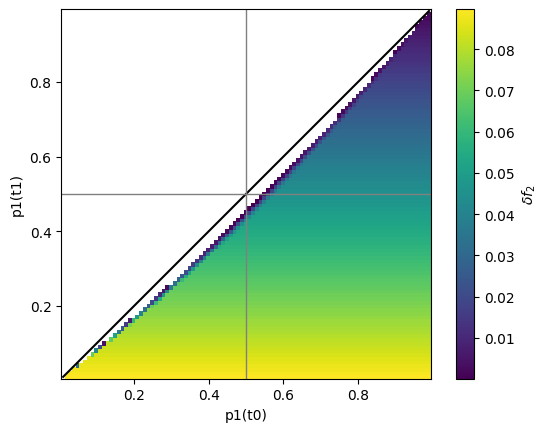

In [97]:
# plotting the heatmap of delta f2
m = plt.pcolor(X, Y, delta_f2_map)
plt.xlabel("p1(t0)")
plt.ylabel("p1(t1)")

cb = plt.colorbar(m)
cb.set_label(r'$\delta f_2$')

plt.plot(p_range, p_range, color='k');
plt.axvline(0.5, color='grey', lw=1);
plt.axhline(0.5, color='grey', lw=1);

plt.gca().set_aspect('equal');

<ipython-input-98-6159d9a22bb0>:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(m)


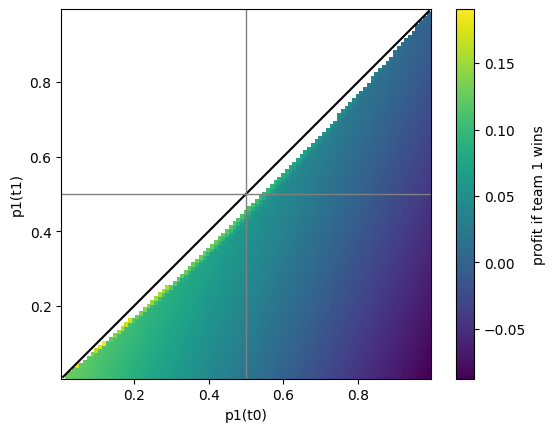

In [98]:
# plotting the heatmap of return if team 1 wins
m = plt.pcolor(X, Y, ret1win_map)
plt.xlabel("p1(t0)")
plt.ylabel("p1(t1)")

cb = plt.colorbar(m)
cb.set_label('profit if team 1 wins')

plt.plot(p_range, p_range, color='k');
plt.axvline(0.5, color='grey', lw=1);
plt.axhline(0.5, color='grey', lw=1);

plt.gca().set_aspect('equal');

<ipython-input-99-dfd8a074b69e>:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(m)


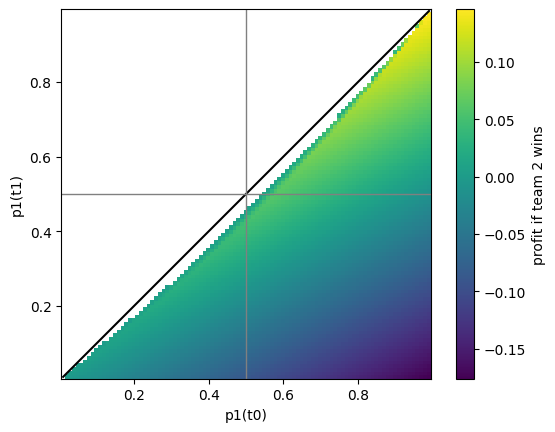

In [99]:
# plotting the heatmap of return if team 2 wins
m = plt.pcolor(X, Y, ret2win_map)
plt.xlabel("p1(t0)")
plt.ylabel("p1(t1)")

cb = plt.colorbar(m)
cb.set_label('profit if team 2 wins')

plt.plot(p_range, p_range, color='k');
plt.axvline(0.5, color='grey', lw=1);
plt.axhline(0.5, color='grey', lw=1);

plt.gca().set_aspect('equal');

<ipython-input-100-952991d2d98a>:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(m)


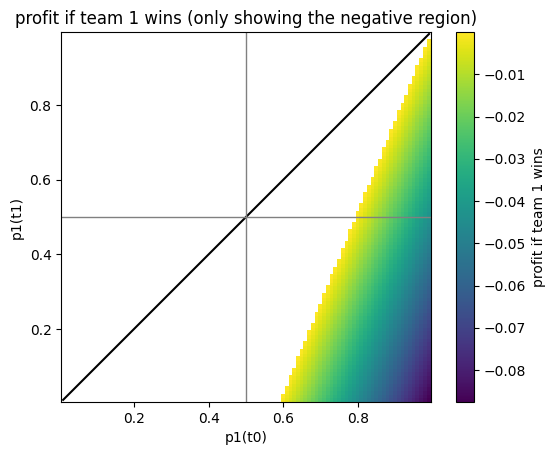

In [100]:
# plotting the heatmap of return if team 1 wins (only showing the negative region)
plt.title("profit if team 1 wins (only showing the negative region)")

ret1win_map_neg = ret1win_map.copy()
ret1win_map_neg[ret1win_map > 0] = np.nan
m = plt.pcolor(X, Y, ret1win_map_neg)
plt.xlabel("p1(t0)")
plt.ylabel("p1(t1)")

cb = plt.colorbar(m)
cb.set_label('profit if team 1 wins')

plt.plot(p_range, p_range, color='k');
plt.axvline(0.5, color='grey', lw=1);
plt.axhline(0.5, color='grey', lw=1);

plt.gca().set_aspect('equal');

<ipython-input-101-8940c6b266f7>:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(m)


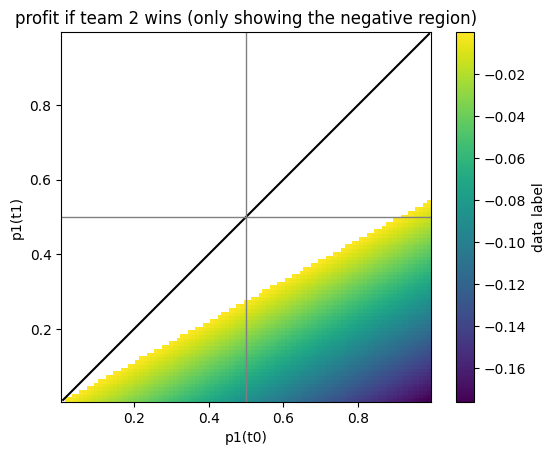

In [101]:
# plotting the heatmap of return if team 2 wins (only showing the negative region)
plt.title("profit if team 2 wins (only showing the negative region)")

ret2win_map_neg = ret2win_map.copy()
ret2win_map_neg[ret2win_map > 0] = np.nan
m = plt.pcolor(X, Y, ret2win_map_neg)
plt.xlabel("p1(t0)")
plt.ylabel("p1(t1)")

cb = plt.colorbar(m)
cb.set_label('data label')

plt.plot(p_range, p_range, color='k');
plt.axvline(0.5, color='grey', lw=1);
plt.axhline(0.5, color='grey', lw=1);

plt.gca().set_aspect('equal');